In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns

In [2]:

# Esto es para acceder al directorio de arcgivos de Kaggle
# No hace falta correrlo si se tienen los datos en forma local
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/this-week-in-chess-archive/twic_master.csv
/kaggle/input/this-week-in-chess-archive/twic_master.parquet
/kaggle/input/this-week-in-chess-archive/metadata.csv
/kaggle/input/this-week-in-chess-archive/pgns/twic1032.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1351.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1167.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1452.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic963.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1027.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1179.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1133.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1176.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1442.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1279.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1342.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1069.pgn
/kaggle/input/this-week-in-chess-archive/pgns/twic1195.pgn
/ka

In [3]:
# llamo al archivo "twic_master.csv" y creo el dataframe
df = pd.read_csv('/kaggle/input/this-week-in-chess-archive/twic_master.csv')


# esto es para que muestre todas las columnas del df
pd.set_option('display.max_columns', None) 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (10,13,14,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head(5)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476.0,1503014.0,2527.0,2835.0,"Pelikan, Chelyabinsk variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192.0,4611500.0,2746.0,2483.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045.0,24101605.0,2620.0,2709.0,"Canal-Sokolsky attack, 3...Bd7",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737.0,4115341.0,2719.0,2592.0,NaN,GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507.0,13300474.0,2637.0,2765.0,"two knights, Suttles variation",GM,GM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Casi 2 millones de partidas
df.shape

(1971319, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971319 entries, 0 to 1971318
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   twic_number     int64  
 1   White           object 
 2   Black           object 
 3   Date            object 
 4   EventDate       object 
 5   Event           object 
 6   Result          object 
 7   mainline_moves  object 
 8   Site            object 
 9   Online          bool   
 10  Round           object 
 11  ECO             object 
 12  Opening         object 
 13  WhiteFideId     object 
 14  BlackFideId     object 
 15  WhiteElo        float64
 16  BlackElo        float64
 17  Variation       object 
 18  WhiteTitle      object 
 19  BlackTitle      object 
 20  WhiteTeam       object 
 21  BlackTeam       object 
 22  EventType       object 
 23  FEN             object 
 24  SetUp           float64
 25  Variant         object 
 26  Board           float64
 27  PlyCount        float64
 28  EventCategor

In [7]:
df[~df.Variant.isnull()]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
18737,1335,"Guliyev,N","Edouard,R",2020-05-25,2020.05.25,C'Chartres Showmatch 1,1/2-1/2,1. e4 g5 2. Ne3 e6 3. d4 d5 4. e5 c5 5. c3 Nc6...,Europe-Echecs INT,True,3,NaN,NaN,13400363.0,633429.0,2529.0,2649.0,NaN,GM,GM,NaN,NaN,NaN,rnbqknrb/pppppppp/8/8/8/8/PPPPPPPP/RNBQKNRB w ...,1.0,chess 960,NaN,NaN,NaN
18738,1335,"Edouard,R","Guliyev,N",2020-05-25,2020.05.25,C'Chartres Showmatch 1,0-1,1. e4 e5 2. Ng3 f6 3. f3 Be6 4. Nh5 O-O 5. f4 ...,Europe-Echecs INT,True,4,NaN,NaN,633429.0,13400363.0,2649.0,2529.0,NaN,GM,GM,NaN,NaN,NaN,rnqbkrbn/pppppppp/8/8/8/8/PPPPPPPP/RNQBKRBN w ...,1.0,chess 960,NaN,NaN,NaN
18753,1335,"Maurizzi,Marc Andria","Guliyev,N",2020-06-04,2020.06.04,C'Chartres Showmatch 3,1/2-1/2,1. f4 c5 2. g3 f5 3. c4 Be6 4. Nb3 b6 5. d4 cx...,Europe-Echecs INT,True,3,NaN,NaN,36083534.0,13400363.0,2433.0,2529.0,NaN,IM,GM,NaN,NaN,NaN,nqrnkrbb/pppppppp/8/8/8/8/PPPPPPPP/NQRNKRBB w ...,1.0,chess 960,NaN,NaN,NaN
18754,1335,"Guliyev,N","Maurizzi,Marc Andria",2020-06-04,2020.06.04,C'Chartres Showmatch 3,1/2-1/2,NaN,Europe-Echecs INT,True,4,NaN,NaN,13400363.0,36083534.0,2529.0,2433.0,NaN,GM,IM,NaN,NaN,NaN,rnqbkrbn/pppppppp/8/8/8/8/PPPPPPPP/RNQBKRBN w ...,1.0,chess 960,NaN,NaN,NaN
18813,1335,"Kuzubov,Y","Eljanov,P",2020-06-04,2020.06.04,Gladiators FR June 4 2020,1-0,1. d4 d5 2. c3 Nd6 3. h3 f6 4. Bh2 Bf7 5. O-O ...,chess.com INT,True,1,NaN,NaN,14112906.0,14102951.0,2643.0,2672.0,NaN,GM,GM,NaN,NaN,NaN,nbnrqkbr/pppppppp/8/8/8/8/PPPPPPPP/NBNRQKBR w ...,1.0,Chess960,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949645,1401,"Aronian,L","Dominguez Perez,L",2021-09-10,2021.09.08,Champions Showdown 9LX,0-1,1. e4 e5 2. c3 Ne6 3. Nf3 g6 4. Ng3 d6 5. O-O ...,Saint Louis USA,False,9.1,NaN,NaN,13300474.0,3503240.0,2782.0,2760.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949646,1401,"Caruana,F","Shankland,S",2021-09-10,2021.09.08,Champions Showdown 9LX,1/2-1/2,1. e4 Nf6 2. c3 e5 3. g4 h6 4. d4 d6 5. Ne3 h5...,Saint Louis USA,False,9.2,NaN,NaN,2020009.0,2004887.0,2800.0,2720.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949647,1401,"Svidler,P","Mamedyarov,S",2021-09-10,2021.09.08,Champions Showdown 9LX,1-0,1. e4 g6 2. c3 c5 3. g3 d6 4. Ne3 Nf6 5. f4 Ng...,Saint Louis USA,False,9.3,NaN,NaN,4102142.0,13401319.0,2701.0,2762.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949648,1401,"Nakamura,Hi","So,W",2021-09-10,2021.09.08,Champions Showdown 9LX,1/2-1/2,1. g3 g6 2. c3 c6 3. d4 d5 4. Nd3 Nd6 5. Bf4 g...,Saint Louis USA,False,9.4,NaN,NaN,2016192.0,5202213.0,2736.0,2778.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN


In [8]:
df[~df.FEN.isna()]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
18737,1335,"Guliyev,N","Edouard,R",2020-05-25,2020.05.25,C'Chartres Showmatch 1,1/2-1/2,1. e4 g5 2. Ne3 e6 3. d4 d5 4. e5 c5 5. c3 Nc6...,Europe-Echecs INT,True,3,NaN,NaN,13400363.0,633429.0,2529.0,2649.0,NaN,GM,GM,NaN,NaN,NaN,rnbqknrb/pppppppp/8/8/8/8/PPPPPPPP/RNBQKNRB w ...,1.0,chess 960,NaN,NaN,NaN
18738,1335,"Edouard,R","Guliyev,N",2020-05-25,2020.05.25,C'Chartres Showmatch 1,0-1,1. e4 e5 2. Ng3 f6 3. f3 Be6 4. Nh5 O-O 5. f4 ...,Europe-Echecs INT,True,4,NaN,NaN,633429.0,13400363.0,2649.0,2529.0,NaN,GM,GM,NaN,NaN,NaN,rnqbkrbn/pppppppp/8/8/8/8/PPPPPPPP/RNQBKRBN w ...,1.0,chess 960,NaN,NaN,NaN
18753,1335,"Maurizzi,Marc Andria","Guliyev,N",2020-06-04,2020.06.04,C'Chartres Showmatch 3,1/2-1/2,1. f4 c5 2. g3 f5 3. c4 Be6 4. Nb3 b6 5. d4 cx...,Europe-Echecs INT,True,3,NaN,NaN,36083534.0,13400363.0,2433.0,2529.0,NaN,IM,GM,NaN,NaN,NaN,nqrnkrbb/pppppppp/8/8/8/8/PPPPPPPP/NQRNKRBB w ...,1.0,chess 960,NaN,NaN,NaN
18754,1335,"Guliyev,N","Maurizzi,Marc Andria",2020-06-04,2020.06.04,C'Chartres Showmatch 3,1/2-1/2,NaN,Europe-Echecs INT,True,4,NaN,NaN,13400363.0,36083534.0,2529.0,2433.0,NaN,GM,IM,NaN,NaN,NaN,rnqbkrbn/pppppppp/8/8/8/8/PPPPPPPP/RNQBKRBN w ...,1.0,chess 960,NaN,NaN,NaN
18813,1335,"Kuzubov,Y","Eljanov,P",2020-06-04,2020.06.04,Gladiators FR June 4 2020,1-0,1. d4 d5 2. c3 Nd6 3. h3 f6 4. Bh2 Bf7 5. O-O ...,chess.com INT,True,1,NaN,NaN,14112906.0,14102951.0,2643.0,2672.0,NaN,GM,GM,NaN,NaN,NaN,nbnrqkbr/pppppppp/8/8/8/8/PPPPPPPP/NBNRQKBR w ...,1.0,Chess960,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949645,1401,"Aronian,L","Dominguez Perez,L",2021-09-10,2021.09.08,Champions Showdown 9LX,0-1,1. e4 e5 2. c3 Ne6 3. Nf3 g6 4. Ng3 d6 5. O-O ...,Saint Louis USA,False,9.1,NaN,NaN,13300474.0,3503240.0,2782.0,2760.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949646,1401,"Caruana,F","Shankland,S",2021-09-10,2021.09.08,Champions Showdown 9LX,1/2-1/2,1. e4 Nf6 2. c3 e5 3. g4 h6 4. d4 d6 5. Ne3 h5...,Saint Louis USA,False,9.2,NaN,NaN,2020009.0,2004887.0,2800.0,2720.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949647,1401,"Svidler,P","Mamedyarov,S",2021-09-10,2021.09.08,Champions Showdown 9LX,1-0,1. e4 g6 2. c3 c5 3. g3 d6 4. Ne3 Nf6 5. f4 Ng...,Saint Louis USA,False,9.3,NaN,NaN,4102142.0,13401319.0,2701.0,2762.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949648,1401,"Nakamura,Hi","So,W",2021-09-10,2021.09.08,Champions Showdown 9LX,1/2-1/2,1. g3 g6 2. c3 c6 3. d4 d5 4. Nd3 Nd6 5. Bf4 g...,Saint Louis USA,False,9.4,NaN,NaN,2016192.0,5202213.0,2736.0,2778.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN


In [9]:
df[~df.SetUp.isna()]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
18737,1335,"Guliyev,N","Edouard,R",2020-05-25,2020.05.25,C'Chartres Showmatch 1,1/2-1/2,1. e4 g5 2. Ne3 e6 3. d4 d5 4. e5 c5 5. c3 Nc6...,Europe-Echecs INT,True,3,NaN,NaN,13400363.0,633429.0,2529.0,2649.0,NaN,GM,GM,NaN,NaN,NaN,rnbqknrb/pppppppp/8/8/8/8/PPPPPPPP/RNBQKNRB w ...,1.0,chess 960,NaN,NaN,NaN
18738,1335,"Edouard,R","Guliyev,N",2020-05-25,2020.05.25,C'Chartres Showmatch 1,0-1,1. e4 e5 2. Ng3 f6 3. f3 Be6 4. Nh5 O-O 5. f4 ...,Europe-Echecs INT,True,4,NaN,NaN,633429.0,13400363.0,2649.0,2529.0,NaN,GM,GM,NaN,NaN,NaN,rnqbkrbn/pppppppp/8/8/8/8/PPPPPPPP/RNQBKRBN w ...,1.0,chess 960,NaN,NaN,NaN
18753,1335,"Maurizzi,Marc Andria","Guliyev,N",2020-06-04,2020.06.04,C'Chartres Showmatch 3,1/2-1/2,1. f4 c5 2. g3 f5 3. c4 Be6 4. Nb3 b6 5. d4 cx...,Europe-Echecs INT,True,3,NaN,NaN,36083534.0,13400363.0,2433.0,2529.0,NaN,IM,GM,NaN,NaN,NaN,nqrnkrbb/pppppppp/8/8/8/8/PPPPPPPP/NQRNKRBB w ...,1.0,chess 960,NaN,NaN,NaN
18754,1335,"Guliyev,N","Maurizzi,Marc Andria",2020-06-04,2020.06.04,C'Chartres Showmatch 3,1/2-1/2,NaN,Europe-Echecs INT,True,4,NaN,NaN,13400363.0,36083534.0,2529.0,2433.0,NaN,GM,IM,NaN,NaN,NaN,rnqbkrbn/pppppppp/8/8/8/8/PPPPPPPP/RNQBKRBN w ...,1.0,chess 960,NaN,NaN,NaN
18813,1335,"Kuzubov,Y","Eljanov,P",2020-06-04,2020.06.04,Gladiators FR June 4 2020,1-0,1. d4 d5 2. c3 Nd6 3. h3 f6 4. Bh2 Bf7 5. O-O ...,chess.com INT,True,1,NaN,NaN,14112906.0,14102951.0,2643.0,2672.0,NaN,GM,GM,NaN,NaN,NaN,nbnrqkbr/pppppppp/8/8/8/8/PPPPPPPP/NBNRQKBR w ...,1.0,Chess960,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949645,1401,"Aronian,L","Dominguez Perez,L",2021-09-10,2021.09.08,Champions Showdown 9LX,0-1,1. e4 e5 2. c3 Ne6 3. Nf3 g6 4. Ng3 d6 5. O-O ...,Saint Louis USA,False,9.1,NaN,NaN,13300474.0,3503240.0,2782.0,2760.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949646,1401,"Caruana,F","Shankland,S",2021-09-10,2021.09.08,Champions Showdown 9LX,1/2-1/2,1. e4 Nf6 2. c3 e5 3. g4 h6 4. d4 d6 5. Ne3 h5...,Saint Louis USA,False,9.2,NaN,NaN,2020009.0,2004887.0,2800.0,2720.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949647,1401,"Svidler,P","Mamedyarov,S",2021-09-10,2021.09.08,Champions Showdown 9LX,1-0,1. e4 g6 2. c3 c5 3. g3 d6 4. Ne3 Nf6 5. f4 Ng...,Saint Louis USA,False,9.3,NaN,NaN,4102142.0,13401319.0,2701.0,2762.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN
1949648,1401,"Nakamura,Hi","So,W",2021-09-10,2021.09.08,Champions Showdown 9LX,1/2-1/2,1. g3 g6 2. c3 c6 3. d4 d5 4. Nd3 Nd6 5. Bf4 g...,Saint Louis USA,False,9.4,NaN,NaN,2016192.0,5202213.0,2736.0,2778.0,NaN,GM,GM,NaN,NaN,NaN,rbbknnrq/pppppppp/8/8/8/8/PPPPPPPP/RBBKNNRQ w ...,1.0,Chess960,NaN,NaN,NaN


Las columnas SetUp, FEN y Variant cuando no son nulas hacen referencia a la modalidad chess960. Voy a dropear los registros de esta modalidad, son alrededor de 550 partidas.

Las columnas PlyCount, Board, EventCategory, BlackTeam y WhiteTeam no me aportan nada interesante. Las primeras tres son casi todas nulas, y los equipos no interesan.

In [10]:
# Tiro las columnas que no interesan
df = df.drop(["PlyCount", "Board", "EventCategory", "BlackTeam", "WhiteTeam"], axis=1)

In [11]:
# Primero me quedo solo con los registros nulos en las columnas relacionadas con la modalidad 960
# De este modo me voy a quedar con las partidas que NO son 960chess
df = df[ (df.Variant.isna()) & (df.FEN.isna()) & (df.SetUp.isna()) ]

# Despues tiro estas columnas que ya no me dicen nada
df = df.drop(["Variant", "FEN", "SetUp"], axis=1)

In [12]:
display(df.shape)
df.columns

(1970769, 21)

Index(['twic_number', 'White', 'Black', 'Date', 'EventDate', 'Event', 'Result',
       'mainline_moves', 'Site', 'Online', 'Round', 'ECO', 'Opening',
       'WhiteFideId', 'BlackFideId', 'WhiteElo', 'BlackElo', 'Variation',
       'WhiteTitle', 'BlackTitle', 'EventType'],
      dtype='object')

In [13]:
# Vamos a poner todas las letras en minuscula y eliminar espacios en los extremos
# En "mainline_moves" y "ECO" NO toco las mayúsculas ya tienen relevancia en la notación.
cols = ["White", "Black", "Event", "Site", "Opening", "Variation", "WhiteTitle", "BlackTitle", "EventType"]
for feature in cols:
    
    df[feature] = df[feature].str.lower().str.strip()


In [14]:
# Parece que son todas blitz y rapidas. No parece haber ni clasicas, ni bullet.
display(df.EventType.value_counts())
# Pero hay muchos nulos (90%)
print("\nPrevalencia de nulos")
df.EventType.isna().value_counts(normalize=True)

team                  80971
swiss                 54121
blitz                 17099
team-tourn             9879
tourn                  9488
rapid                  7267
team-swiss             3788
k.o.                   2977
swiss (blitz)          2188
k.o. blitz              915
swiss (rapid)           485
team-match              400
team-tourn (rapid)      362
match                   334
schev                   320
match (blitz)           207
tourn (rapid)           197
tourn (blitz)           197
match (rapid)           158
k.o. (blitz)            150
team-swiss (rapid)      112
team (rapid)            109
team-match (blitz)       94
tourn (corr)             91
team-                    80
team-schev (blitz)       64
schev (rapid)            64
schev (blitz)            40
team-schev (rapid)       32
team-match (rapid)       22
k.o. rapid               17
team-k.o.                16
simul                    15
game (blitz)              1
game                      1
Name: EventType, dty


Prevalencia de nulos


True     0.902444
False    0.097556
Name: EventType, dtype: float64

In [15]:
# Vamos a ver el evento que invita, a ver si podemos asegurarnos que sólo hay partidas rápidas:
# Por ejemplo el torneo de candidatos, el tata steel, la sinquefiels cup de st louis, o los grand prix son a tiempo clásico, veamos si están:
df[(df.Event.str.contains("candidates")) | (df.Event.str.contains("sinquefield")) | (df.Event.str.contains("tata")) | (df.Event.str.contains("grand prix"))]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType
35524,949,"aronian,l","van wely,l",2013-01-12,2013.01.12,75th tata steel gpa,1/2-1/2,1. d4 Nf6 2. c4 g6 3. Nc3 Bg7 4. e4 d6 5. Nf3 ...,wijk aan zee ned,False,1.1,E90,king's indian,13300474.0,1000268.0,2802.0,2679.0,5.nf3,gm,gm,NaN
35525,949,"carlsen,m","caruana,f",2013-01-12,2013.01.12,75th tata steel gpa,1/2-1/2,1. c4 g6 2. e4 e5 3. Nc3 Bg7 4. g3 d6 5. Nge2 ...,wijk aan zee ned,False,1.2,A10,english,1503014.0,2020009.0,2861.0,2781.0,adorjan defence,gm,gm,NaN
35526,949,"harikrishna,p","giri,a",2013-01-12,2013.01.12,75th tata steel gpa,1-0,1. e4 e6 2. d4 d5 3. Nc3 dxe4 4. Nxe4 Nd7 5. N...,wijk aan zee ned,False,1.3,C10,french,5007003.0,24116068.0,2698.0,2720.0,rubinstein variation,gm,gm,NaN
35527,949,"anand,v","nakamura,hi",2013-01-12,2013.01.12,75th tata steel gpa,1/2-1/2,1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. e5 Nfd7 5. f4 ...,wijk aan zee ned,False,1.4,C11,french,5000017.0,2016192.0,2772.0,2769.0,"steinitz, boleslavsky variation",gm,gm,NaN
35528,949,"sokolov,ivan",wang hao,2013-01-12,2013.01.12,75th tata steel gpa,1/2-1/2,1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. e3 O-O 5. Bd3...,wijk aan zee ned,False,1.5,E52,nimzo-indian,14400030.0,8602883.0,2663.0,2752.0,"4.e3, main line with ...b6",gm,gm,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957204,1315,"van dael,siem","vogel,roven",2020-01-20,2020.01.17,82nd tata steel qualifier,1-0,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,wijk aan zee ned,False,4.1,B56,sicilian,1049771.0,12908088.0,2252.0,2465.0,NaN,fm,im,NaN
1957205,1315,"slingerland,f","akash,g",2020-01-20,2020.01.17,82nd tata steel qualifier,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,wijk aan zee ned,False,4.2,B58,sicilian,1002473.0,5040299.0,2333.0,2461.0,boleslavsky variation,im,im,NaN
1957206,1315,"beukema,s","pijpers,a",2020-01-20,2020.01.17,82nd tata steel qualifier,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Qxd4 Nc6 5. B...,wijk aan zee ned,False,4.3,B53,"sicilian, chekhover variation",1024523.0,1019554.0,2389.0,2480.0,NaN,im,im,NaN
1957207,1315,"de boer,eelke","zwirs,nico",2020-01-20,2020.01.17,82nd tata steel qualifier,0-1,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,wijk aan zee ned,False,4.4,B56,sicilian,1048120.0,1036432.0,2324.0,2418.0,NaN,fm,im,NaN


In [16]:
# Están todas las partidas. Sólo que las clasicas tienen "EventType"= nan
# Habría que separar en clásicas, rápidas y blitz.
# Me parece más interesante de analizar la rápidas y blitz, ya que va a haber
# menor porcentaje de empates.

In [17]:
display(df.Event.value_counts())


pro league group stage              7861
ch-fra blitz online qual            4900
djerba women online 2020            4651
world youth u16 olympiad            4275
44th olympiad 2022                  4070
                                    ... 
lviv vs odessa euromaidan m 2014       1
122nd us open armageddon               1
9th bilbao living chess                1
us chess masters tb 2018               1
7th gashimov mem tb                    1
Name: Event, Length: 11148, dtype: int64

In [18]:
# Los títulos más comunes son gran maestro, maestro internacional, maetro fide y candidato a maestro fide, tanto para hombre como para mujeres.
df.WhiteTitle.value_counts()


gm        413226
im        308241
fm        291917
cm         56723
wfm        50710
wim        46374
wgm        39028
wcm        13825
wc           428
wf           356
nm           222
agm           41
sim           40
              34
aim           23
iv            18
mf            15
afm           14
v             12
iii           12
i             10
mc             8
1              7
mk             5
ii             4
vk             4
fc             4
â              2
i++            1
423947         1
411779         1
cn             1
2              1
--             1
Name: WhiteTitle, dtype: int64

In [19]:
# Quedémonos sólo con los títulos más comunes

titulos = ["gm", "im", "fm", "cm", "wfm", "wim", "wgm", "wcm"]

df = df[(df.WhiteTitle.isin(titulos)) & (df.BlackTitle.isin(titulos))]

df.shape # Los registros se me van a la mitad

(947598, 21)

In [20]:
# Donde se jugo
df.Site.value_counts().head(50)

chess.com int          289194
lichess.org int         24698
moscow rus              18843
sochi rus               12973
st petersburg rus       12100
budapest hun            10916
warsaw pol               9675
tornelo int              8570
chess24.com int          8568
pardubice cze            7080
batumi geo               6833
saint louis usa          6732
khanty-mansiysk rus      6647
barcelona esp            6646
baku aze                 6250
czech republic cze       6146
riga lat                 5721
prague cze               5659
novi sad srb             5488
caleta eng               5381
berlin ger               5307
austria aut              5250
reykjavik isl            5061
belgrade srb             5032
linares esp              4900
skopje mkd               4895
germany ger              4469
dubai uae                4467
chennai ind              4440
chelyabinsk rus          4231
tromso nor               4140
riyadh ksa               3702
yerevan arm              3544
doha qat  

In [21]:
# Porcentaje de partidas presenciales y virtuales
df.Online.value_counts(normalize=True)

False    0.644665
True     0.355335
Name: Online, dtype: float64

In [22]:
print("Partidas online:")
display(df[df.Online==True].Site.value_counts())
print("\nPartidas presenciales:")
display(df[df.Online==False].Site.value_counts())

Partidas online:


chess.com int              289194
lichess.org int             24698
tornelo int                  8570
chess24.com int              8568
europe-echecs int            2658
icc int                      1058
playchess int                1014
europe-chess int              590
premium chess arena int       219
iccf int                      121
aunix int                      17
chess supersite int             6
playchess.com int               2
Name: Site, dtype: int64


Partidas presenciales:


moscow rus           18843
sochi rus            12973
st petersburg rus    12100
budapest hun         10916
warsaw pol            9675
                     ...  
frome eng                1
didymoteicho gre         1
cakovec cro              1
miedzyzdroje pol         1
chapel hill usa          1
Name: Site, Length: 1807, dtype: int64

In [23]:
# El evento que invita
df.Event.value_counts()

pro league group stage                    6596
titled arena apr 3rd 2021                 2799
titled arena may 8th 2021                 2718
titled tuesday 2nd june                   2504
titled arena mar 6th 2021                 2488
                                          ... 
us chess masters tb 2017                     1
ch-blr w 2016                                1
2nd metropolitan international playoff       1
yinzhou cup men tb 2019                      1
fsfma december 2013                          1
Name: Event, Length: 10659, dtype: int64

In [24]:
# Mezclando todos los controles de tiempo tenemos 39% gana blancas, el 31% gana negras y el 30% es tablas
df.Result.value_counts(normalize=True)

1-0        0.390458
0-1        0.312615
1/2-1/2    0.296906
*          0.000009
-          0.000004
0-0        0.000002
-/+        0.000002
(+)-(-)    0.000001
1-O        0.000001
+/-        0.000001
Name: Result, dtype: float64

In [25]:
# Ya que estamos filtramos los registros con resultados mal cargados
display(df.shape)
df = df[(df.Result=="1-0") | (df.Result=="0-1") | (df.Result=="1/2-1/2")]
display(df.shape)

(947598, 21)

(947578, 21)

In [26]:
# Tenemos 304 aperturas diferentes
df.Opening.value_counts()

sicilian                                                        145975
king's indian                                                    50837
french                                                           49556
ruy lopez                                                        46412
qgd                                                              43872
                                                                 ...  
four knights game: gunsberg variation                                1
scandinavian defense: mieses-kotroc variation                        1
caro-kann defense: classical variation                               1
sicilian defense: najdorf variation, poisoned pawn variation         1
dutch, spielmann gambit                                              1
Name: Opening, Length: 304, dtype: int64

In [27]:
# Tenemos 501 variantes diferentes sobre las aperturas (según Enciclopedia of Chess Openings)
df.ECO.value_counts()

A45    22111
B90    15704
A05    15171
D02    15096
A07    14924
       ...  
C38       12
A76        9
E78        5
E57        4
D65        2
Name: ECO, Length: 501, dtype: int64

In [28]:
# Voy a tirar la columna "Round", No me aporta nada.
df = df.drop(["Round"], axis=1)

In [29]:
def Nulos(dtf):
    out = pd.DataFrame(index=["Nulos %"])
    for col in dtf.columns:
        out[col] = dtf[col].isna().sum()/len(dtf)
    display(out)
    
Nulos(df)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType
Nulos %,0.0,0.0,0.0,0.0,0.000375,0.0,0.0,0.003923,0.0,0.0,0.003559,0.006011,0.000099,0.000093,0.000455,0.000459,0.326356,0.0,0.0,0.909445


In [30]:
# Veamos enfrentamientos entre carlsen y dubov:
df[((df.White.str.contains("carlsen"))&(df.Black.str.contains("dubov")))|((df.White.str.contains("dubov"))&(df.Black.str.contains("carlsen")))]

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType
1007,1260,"dubov,daniil","carlsen,m",2018-12-28,2018.12.26,world rapid 2018,1/2-1/2,1. c4 e6 2. Nf3 d5 3. d4 c6 4. Nbd2 f5 5. g3 N...,st petersburg rus,False,A13,english opening,24126055.0,1503014.0,2703.0,2835.0,agincourt variation,gm,gm,NaN
299479,1421,"carlsen,m","dubov,daniil",2022-01-30,2022.01.15,84th tata steel masters,1-0,NaN,wijk aan zee ned,False,NaN,NaN,1503014.0,24126055.0,2865.0,2720.0,NaN,gm,gm,NaN
304389,1365,"carlsen,m","dubov,daniil",2020-12-29,2020.12.29,airthings masters ko 2020,1-0,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. d3...,chess24.com int,True,C77,ruy lopez,1503014.0,24126055.0,2862.0,2702.0,anderssen variation,gm,gm,NaN
304393,1365,"dubov,daniil","carlsen,m",2020-12-29,2020.12.29,airthings masters ko 2020,1/2-1/2,1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. g3 dxc4 5. Bg2...,chess24.com int,True,E04,catalan,24126055.0,1503014.0,2702.0,2862.0,"open, 5.nf3",gm,gm,NaN
304397,1365,"carlsen,m","dubov,daniil",2020-12-29,2020.12.29,airthings masters ko 2020,0-1,1. Nf3 Nf6 2. c4 e6 3. Nc3 c5 4. e3 a6 5. d4 d...,chess24.com int,True,A15,english opening,1503014.0,24126055.0,2862.0,2702.0,NaN,gm,gm,NaN
304401,1365,"dubov,daniil","carlsen,m",2020-12-29,2020.12.29,airthings masters ko 2020,1/2-1/2,1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. g3 Bb4+ 5. Nbd...,chess24.com int,True,E10,queen's pawn game,24126055.0,1503014.0,2702.0,2862.0,NaN,gm,gm,NaN
304405,1365,"dubov,daniil","carlsen,m",2020-12-30,2020.12.29,airthings masters ko 2020,1-0,1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. g3 Bb4+ 5. Nbd...,chess24.com int,True,E10,queen's pawn game,24126055.0,1503014.0,2702.0,2862.0,NaN,gm,gm,NaN
304409,1365,"carlsen,m","dubov,daniil",2020-12-30,2020.12.29,airthings masters ko 2020,1/2-1/2,1. e4 e5 2. Nf3 Nc6 3. Nc3 Nf6 4. Bb5 Nd4 5. O...,chess24.com int,True,C48,four knights,1503014.0,24126055.0,2862.0,2702.0,"rubinstein counter-gambit, henneberger variation",gm,gm,NaN
304413,1365,"dubov,daniil","carlsen,m",2020-12-30,2020.12.29,airthings masters ko 2020,1-0,1. d4 Nf6 2. c4 e6 3. Nf3 d5 4. g3 Bb4+ 5. Nbd...,chess24.com int,True,E10,queen's pawn game,24126055.0,1503014.0,2702.0,2862.0,NaN,gm,gm,NaN
331029,1379,"dubov,daniil","carlsen,m",2021-04-03,2021.04.03,titled arena apr 3rd 2021,0-1,1. d4 d5 2. Kd2 Kd7 3. Ke1 Ke8 4. Nf3 Nf6 5. B...,lichess.org int,True,D02,queen's bishop game,24126055.0,1503014.0,2710.0,2847.0,NaN,gm,gm,NaN


In [31]:
df.loc[1007].mainline_moves

'1. c4 e6 2. Nf3 d5 3. d4 c6 4. Nbd2 f5 5. g3 Nf6 6. Bg2 Bd6 7. Ne5 O-O 8. O-O b6 9. Qc2 Bb7 10. cxd5 cxd5 11. Ndf3 Ne4 12. h4 Nd7 13. Bf4 Ndf6 14. Rac1 Ba6 15. Rfe1 Ng4 16. Qa4 Bb7 17. Ng5 Nxg5 18. Bxg5 Qe8 19. Qxe8 Rfxe8 20. Nxg4 fxg4 21. Bf4 Bxf4 22. gxf4 Rac8 23. Kh2 Kf7 24. Kg3 h5 25. f3 gxf3 26. Bxf3'

In [32]:
# Pasemos los números de identificación fide que son tipo object a enteros:

df['WhiteFideId'] = pd.to_numeric(df['WhiteFideId']).convert_dtypes() 

df['BlackFideId'] = pd.to_numeric(df['BlackFideId']).convert_dtypes() 

In [33]:
# Hagamos un df con partidas blitz
df_bz = df[(df.Event.str.contains("blitz")) | (df.EventType.str.contains("blitz"))]
df_bz.shape

(60900, 20)

In [34]:
# Veamos ahora los resultados para blitz:
df_bz.Result.value_counts(normalize=True)

1-0        0.429901
0-1        0.363268
1/2-1/2    0.206831
Name: Result, dtype: float64

In [35]:
# Hagamos un df con partidas rápidas
df_rd = df[(df.Event.str.contains("rapid")) | (df.EventType.str.contains("rapid"))]
df_rd.shape

(43525, 20)

In [36]:
# Veamos los resultados para rápidas:
df_rd.Result.value_counts(normalize=True) 

1-0        0.383733
0-1        0.309041
1/2-1/2    0.307226
Name: Result, dtype: float64

Para blitz se minimizan los empates al 20% y la ventaja blanca.
Para rápidas aumentan los empates al 31% y la ventaja blanca.

In [37]:
# Así podemos contar el nro de movidas
len(df_rd.loc[0].mainline_moves.split())//3


72

In [38]:
# Vamos a ver si los nombres se cargan en más de una manera

print("Para el total de partidas:")
print( f"Nombres: {len(df.White.unique())}" )
print( f"Números FideId: {len(df.WhiteFideId.unique())}" )

print("Para las rapidas:")
print( f"Nombres: {len(df_rd.White.unique())}" )
print( f"Números FideId: {len(df_rd.WhiteFideId.unique())}" )

print("Para las blitz:")
print( f"Nombres: {len(df_bz.White.unique())}" )
print( f"Números FideId: {len(df_bz.WhiteFideId.unique())}" )


Para el total de partidas:
Nombres: 14034
Números FideId: 13620
Para las rapidas:
Nombres: 3768
Números FideId: 3729
Para las blitz:
Nombres: 3259
Números FideId: 3227


In [39]:

# Hay más nombres que números de identificación.
# Parece que los nombres no siempre se cargan igual

fide_id = df.groupby('WhiteFideId').White.agg(nombres=("unique"))
display(fide_id)
fide_id ["nro_nombres"] = fide_id.apply(lambda x: len(x.nombres), axis=1)
display(fide_id)
display(fide_id[fide_id.nro_nombres > 1])


,nombres
WhiteFideId,
100013,"[campora,d]"
100072,"[adla,d]"
100099,"[giardelli,s]"
100129,"[gomez baillo,j]"
100137,"[zarnicki,p]"
...,...
311214550,"[chan,anthony]"
312187930,"[borrmann,laurenz]"
324226923,"[ribeiro,matheus mendes domingues]"


,nombres,nro_nombres
WhiteFideId,,
100013,"[campora,d]",1
100072,"[adla,d]",1
100099,"[giardelli,s]",1
100129,"[gomez baillo,j]",1
100137,"[zarnicki,p]",1
...,...,...
311214550,"[chan,anthony]",1
312187930,"[borrmann,laurenz]",1
324226923,"[ribeiro,matheus mendes domingues]",1


,nombres,nro_nombres
WhiteFideId,,
301264,"[babula,v, babula,vlastimil sr, babula, vlasti...",3
309672,"[havlikova,k, petrova,kristyna]",2
320242,"[olsarova,k, pilsova,karolina]",2
325449,"[olsarova,t, rodshtein,tereza]",2
401161,"[weaving,richard, york-weaving,richard]",2
...,...,...
34115428,"[mukhina,jana, goganova,yana]",2
35002899,"[chitlange,sakshi, chitlange sakshi]",2
35006665,"[sharma,isha, isha,sharma, isha sharma]",3


In [40]:
# En la mayoría de los casos se escribe en orden inverso apellido y nombre,
# ó se escriben separados por espacio o coma.
# Las jugadoras rusas cambian el apellido al casarse.
# Errores de tipeo

# En fin, para ubicar sin errores a un jugador debería utilizarse el "FideId", no su nombre.




In [41]:
Nulos(df_bz)
Nulos(df_rd)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType
Nulos %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005222,0.0,0.0,0.005402,0.008637,0.0,0.0,0.000082,0.000049,0.363957,0.0,0.0,0.741133


,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,EventType
Nulos %,0.0,0.0,0.0,0.0,0.000322,0.0,0.0,0.007398,0.0,0.0,0.008087,0.011832,0.000046,0.000115,0.000184,0.000299,0.338082,0.0,0.0,0.885238


In [42]:
# Dropiemos "variation" y "eventtype" que estan llenas de nulos
df_bz = df_bz.drop(["Variation", "EventType"], axis=1)
df_rd = df_rd.drop(["Variation", "EventType"], axis=1)

In [43]:
# Y tiremos también todos los registros que presenten algún nan:

df_bz = df_bz.dropna() 
display(df_bz.shape)

df_rd = df_rd.dropna() 
display(df_rd.shape)

(60365, 18)

(42975, 18)

In [44]:
Nulos(df_bz)
Nulos(df_rd)

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,WhiteTitle,BlackTitle
Nulos %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,WhiteTitle,BlackTitle
Nulos %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Veamos los rangos de elo que nos quedaron en cada dataframe:
display( min([df_bz.WhiteElo.min(),df_bz.BlackElo.min()]) )
display( max([df_bz.WhiteElo.max(),df_bz.BlackElo.max()]) )

display( min([df_rd.WhiteElo.min(),df_rd.BlackElo.min()]) )
display( max([df_rd.WhiteElo.max(),df_rd.BlackElo.max()]) )


1323.0

2882.0

1282.0

2882.0

Ahora con los dataframes sin nans podemos empezar a ver si los resultados son separables a simple vista. Vamos con un pairplot.

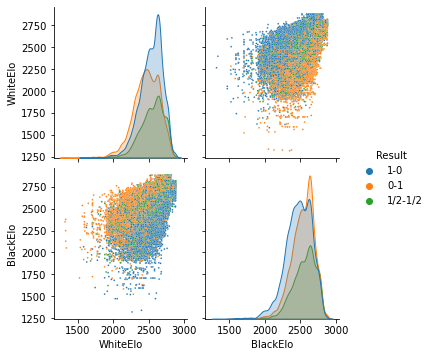

In [47]:
sns.pairplot(df_bz, vars=['WhiteElo', 'BlackElo'], hue = "Result", plot_kws={"s": 3})#, markers=["o", "s"])


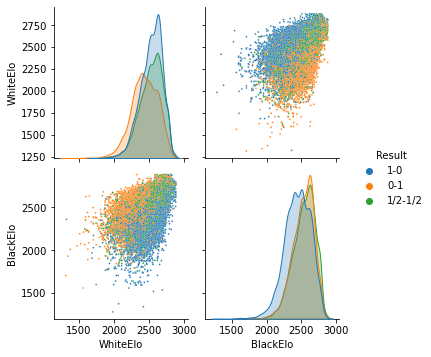

In [48]:
sns.pairplot(df_rd, vars=['WhiteElo', 'BlackElo'], hue = "Result", plot_kws={"s": 3})#, markers=["o", "s"])


In [49]:
# Agreguemos una columna que sea el cociente de los elos
df_bz["EloRatio"] = df_bz.WhiteElo/df_bz.BlackElo

df_rd["EloRatio"] = df_rd.WhiteElo/df_rd.BlackElo

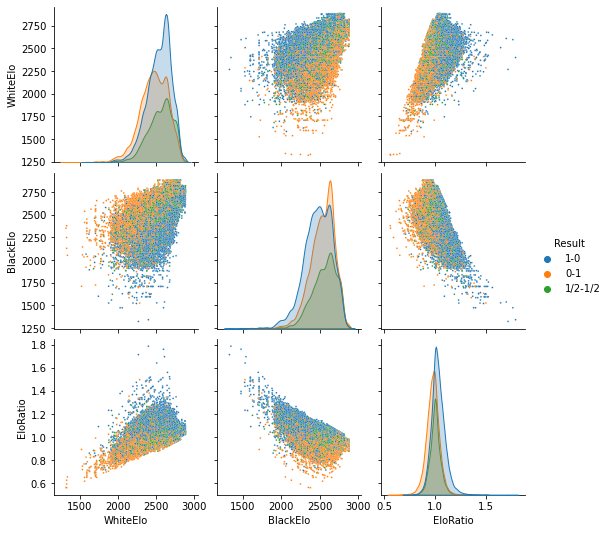

In [50]:
sns.pairplot(df_bz, vars=['WhiteElo', 'BlackElo',"EloRatio"], hue = "Result", plot_kws={"s": 3})#, markers=["o", "s"])


Para Blitz aún cuando los Elos son iguales, las tablas es el resultado menos probable.

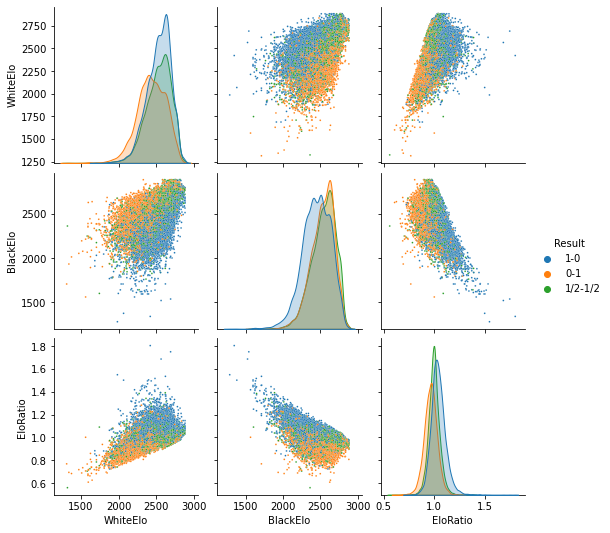

In [51]:
sns.pairplot(df_rd, vars=['WhiteElo', 'BlackElo',"EloRatio"], hue = "Result", plot_kws={"s": 3})#, markers=["o", "s"])


Para las rápidas cuando los Elos son similares, las tablas es el resultado más probable.

Habría que hacer dummies de los FideId para ver si identificar a los jugadores ayuda en la predicción del resultado.

Voy a filtrar con EloRatio entre 1/1,3 y 1,3 las partidas que estén muy desbalanceadas, ya que son muy atípicas.